C:\Users\agrab\AppData\Local\Temp\ipykernel_37348\1166140147.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


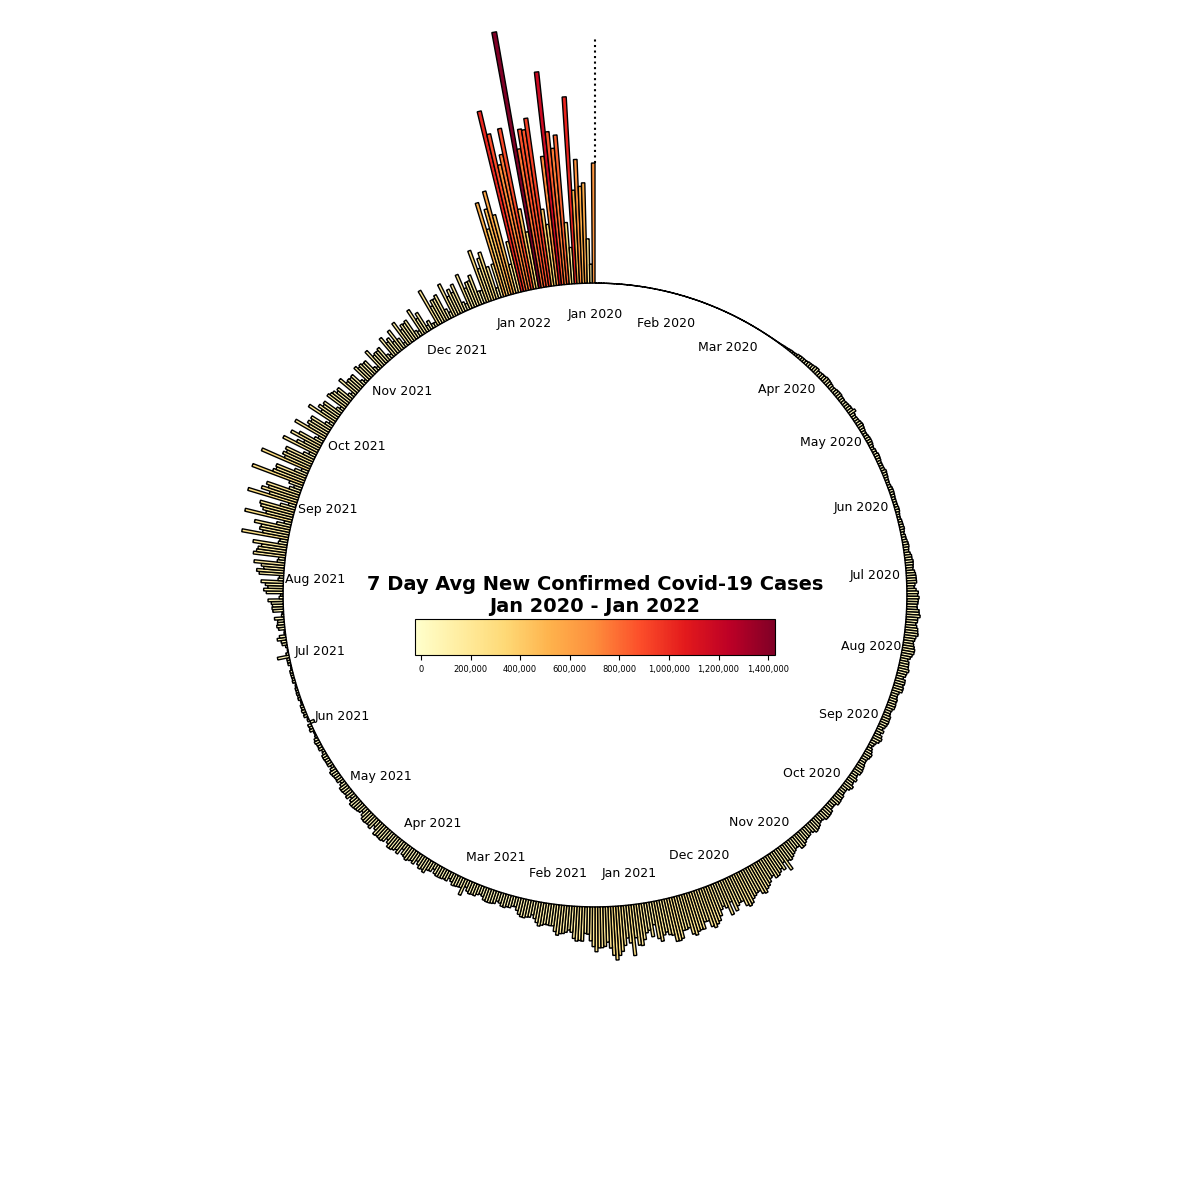

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime
import matplotlib.ticker as ticker  # Import ticker for formatting

# Load the data
data = pd.read_csv('COVID_US_cases.csv', parse_dates=['date'])

# Generate date range from January 2020 to January 2022
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2022, 1, 31)

# Create a date range and reindex the data to include all dates
date_range = pd.date_range(start=start_date, end=end_date)
data = data.set_index('date').reindex(date_range).fillna(0).reset_index()
data.rename(columns={'index': 'date'}, inplace=True)

# Sort data by date
data = data.sort_values('date')

# Prepare data for plotting
values = data['new_confirmed'].values
dates = data['date']

# Number of bars
N = len(values)

# Compute the angle each bar is centered on
angles = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# Normalize the data for color mapping
norm = plt.Normalize(values.min(), values.max())
cmap = plt.cm.YlOrRd  # Color map ranging from yellow to red
colors = cmap(norm(values))

# Increase the inner circle radius to give bars more spacing.
inner_radius = np.max(values) * 1.2

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')  # Start from the top (North)
ax.set_theta_direction(-1)       # Clockwise direction

# Plot the bars with the increased inner circle radius
bars = ax.bar(angles, values, width=2*np.pi/N, bottom=inner_radius,
              color=colors, edgecolor='black', align='edge')

# Remove radial labels and gridlines
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

# --- Remove the Outer Circle ---
# Turn off the polar spine (outer circle)
ax.spines['polar'].set_visible(False)

# --- Move Title Inside the Inner Circle ---
# Place the title in the center of the plot.
ax.text(0, 0, '7 Day Avg New Confirmed \n US Covid-19 Cases',
        fontsize=14, ha='center', va='center', weight='bold')

# --- Move Month and Year Labels Inside the Inner Circle ---
# Place month/year labels along a circle with radius 0.9 * inner_radius.
last_month = None
label_radius = inner_radius * 0.9
for angle, date in zip(angles, dates):
    if date.day == 1 or (last_month is not None and date.month != last_month):
        ax.text(angle, label_radius,
                date.strftime('%b %Y'),
                fontsize=9, ha='center', va='center')
    last_month = date.month

# --- Move Color Legend Up Inside the Inner Circle ---
# Adjust the inset axes for the color bar to place it higher.
# The add_axes coordinates are given in figure fractions: [left, bottom, width, height]
cax = fig.add_axes([0.35, 0.45, 0.3, 0.03])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')

# Set the color bar tick formatter to show full numbers
cbar.ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
cbar.ax.tick_params(labelsize=6)

# --- Add a Dotted Line After the Last Data Point ---
# Get the angle and radial position for the last data point (Jan 2022)
last_angle = angles[-1]+2*np.pi/N
last_value = values[-1]
last_radius = inner_radius + last_value

# Define the extension length for the dotted line
extension_length = 0.4 * inner_radius

# Plot the dotted line
ax.plot([last_angle, last_angle],
        [last_radius, last_radius + extension_length],
        linestyle='dotted', color='black')

plt.tight_layout()
plt.show()
